In [50]:
!nvidia-smi

Tue Sep  5 13:21:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    28W /  70W |    389MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [51]:
# import some libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


In [52]:
print(f"tesnsorflow vwraion :- {tf.__version__}")
print(f"keras version:- {tf.keras.__version__}")

tesnsorflow vwraion :- 2.12.0
keras version:- 2.12.0


In [53]:
# before keras as tenserflow are seprate but not it is the merge on it(keras merge with tenserflow )


In [54]:
!pwd

/content


## Check CPU and GPU

In [55]:
tf.config.list_logical_devices("GPU")

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [56]:
tf.config.list_logical_devices("CPU")

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [57]:
# if in your device not having gpu it's show - this []

# load mnist dataset
## mnist:- it is hand written data set

In [58]:
mnist =tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [59]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [60]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [61]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [62]:
X_train_full.shape

(60000, 28, 28)

In [63]:
y_train_full.shape

(60000,)

In [64]:
X_train_full.dtype
#unsiged integers its means that its value from (0-255)

dtype('uint8')

In [65]:
X_test.shape

(10000, 28, 28)

In [66]:
y_test.shape

(10000,)

(<Axes: >,)

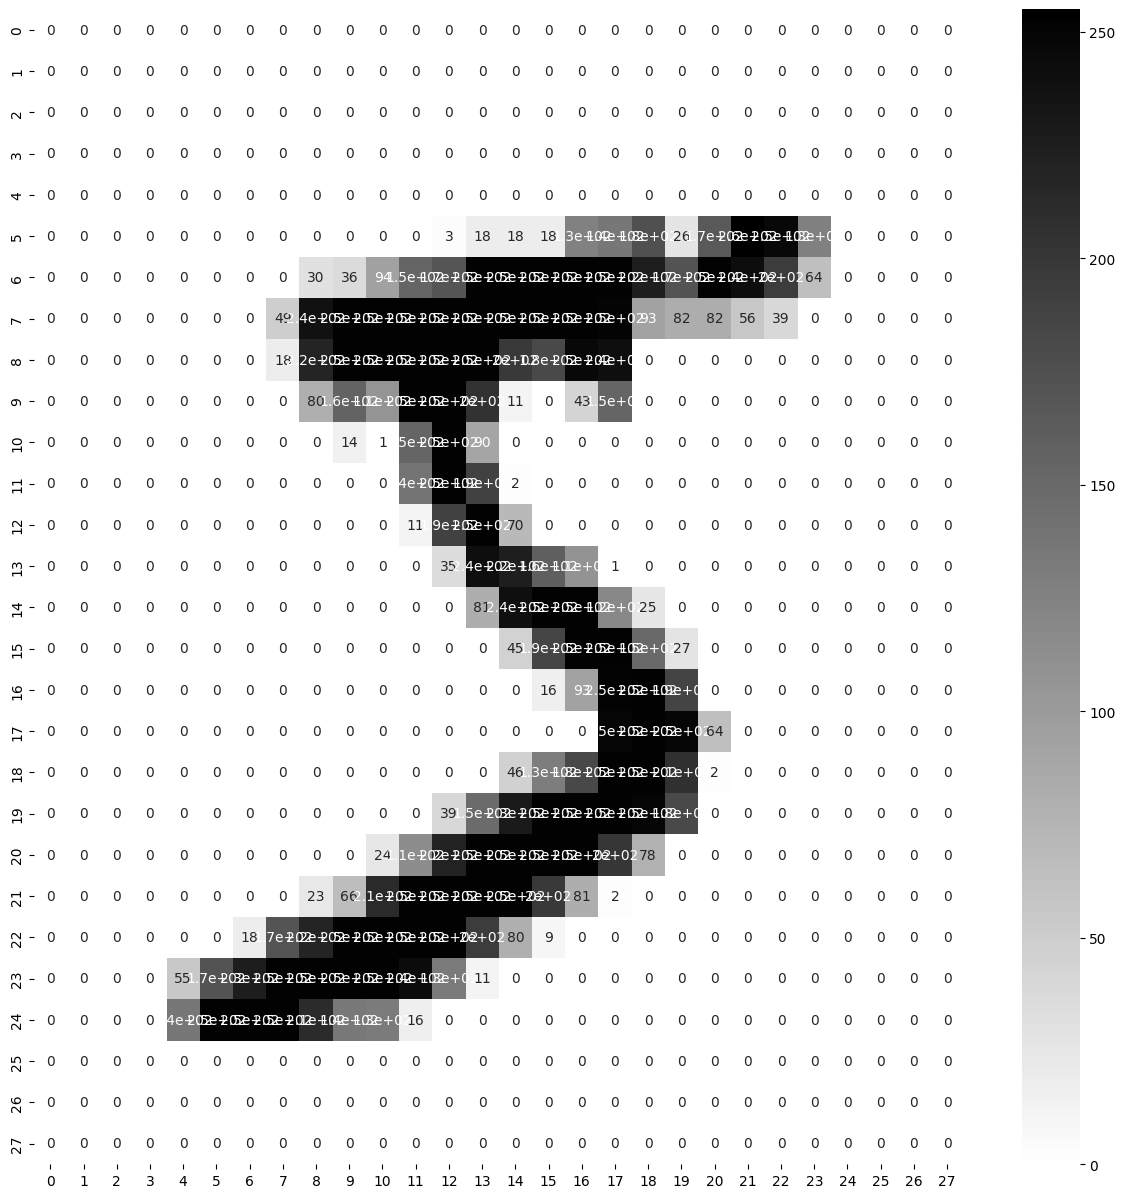

In [67]:
from matplotlib import figure
plt.figure(figsize=(15,15))
sns.heatmap(X_train_full[0],annot =True,cmap="binary"),

In [68]:
# our data between the [0-255]
# therefore we need scaling

In [69]:
# applying scaling(minmax)

X_valid,X_train =X_train_full[:5000]/255., X_train_full[5000:] / 255.
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

### why dot('.') after 255?
#### because in every thing is calculate as the float value.if you want to pass any integers its written like this

In [70]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<Axes: >

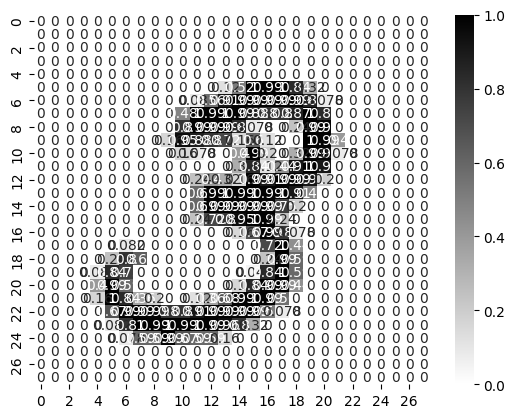

In [71]:
sns.heatmap(X_train[1],annot=True,cmap="binary")

In [72]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

## What is validation set?
### validation set means -we pass validation set during the training where we train our model.
### after every epochs it will validate model on top of validate data and give us loss and accuracy score

In [73]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,))

<Axes: >

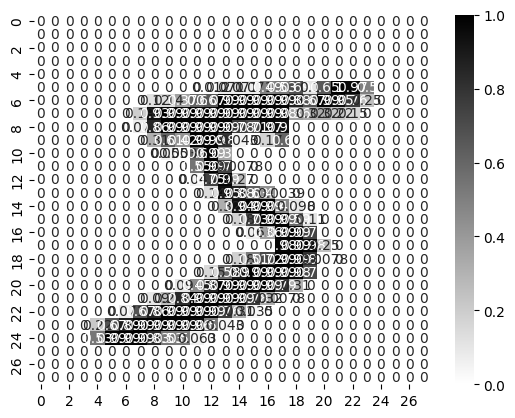

In [74]:
sns.heatmap(X_valid[0],annot=True,cmap="binary")

In [75]:
y_valid

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

### IN machine learning we make partition if the data but in deep learning we make three patition.

In [86]:
LAYERS =[
    tf.keras.layers.Flatten(input_shape = [28,28], name = "inputlayer" ),
    tf.keras.layers.Dense(300,activation = "relu", name = "hiddenlayer1" ),
    tf.keras.layers.Dense(100,activation = "relu" , name = "hiddenlayer2"),
    tf.keras.layers.Dense(10,activation = "softmax",name = "Outputlayer")
]


model = tf.keras.models.Sequential(LAYERS)


## Flatten -Use for make our input data into 1D array
## Dense -Use for the make hidden layer
## This is based on multiclass classification problem that why we take 10 output(0,1,2,3,4,5,6,7,8,9)
## Squential - its makes layers into sequence

In [87]:
model.layers # here model are fit
# this is model location

In [88]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 Outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [89]:
# how trainable parameter count?
Trainable_parameter = (784*300+300) + (300 * 100 +100 )+ (100*10+10)
print(Trainable_parameter)

266610


In [90]:
# if you want to see first hidden layer with name
hidden1 = model.layers[1]
hidden1.name

'hiddenlayer1'

In [92]:
## how we look weight assign by keras(for one data)
hidden1.get_weights()

# we adjust the weight by backpropogation

[array([[ 0.07334656, -0.06618373,  0.04323639, ...,  0.02670551,
          0.01967165,  0.00734604],
        [ 0.06037463,  0.03775804, -0.03139628, ..., -0.00248624,
         -0.000749  ,  0.05625258],
        [-0.02214809, -0.00751865,  0.04413879, ..., -0.07178342,
          0.02315067,  0.01303991],
        ...,
        [ 0.06336547, -0.03993004,  0.05802579, ..., -0.06071485,
          0.03987987, -0.01713273],
        [-0.00355947,  0.00214234, -0.05762871, ...,  0.05370553,
         -0.05680599, -0.0268455 ],
        [ 0.06000853,  0.02361722,  0.04293939, ..., -0.03697599,
          0.0431233 ,  0.00628097]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [95]:
Loss_function = "sparse_categorical_crossentropy" # -> tf.losses.sparse_categorical_crossentropy
Optimizers = "SGD" #-> use for custom learning rate -> tf.keras.optimizers.SGD(0.02)
Metrics = ["accuracy"]

In [94]:
# why sparse :- because our data spread into [0-1]
#why accuracy instead of r2_score :- beacuse it is categorical problemor classification problem statement

In [100]:
model.compile(loss = Loss_function, optimizer =Optimizers,metrics =Metrics )

# Tensorboard callback function
### Callback :- it will  direct give us the place where all the data model include or we can say that all the info of the model

In [ ]:
# this is provded by tensor flow
# i am exixuted this you can

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

## Early stopping call back
#### It will automatically stop your training exicuation when our training accuracy is not increasing

like :- when you train with 100 epochs but after 10 epochs it will not increase you accuracy in that case you early stoping will stop the exicuation because that will be incerasing .

here we set the 5 epochs for the data

In [101]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

# Model check call backs:-
### In this , we make a file that file store our results if system will crash by any proble that time our result store at that file after system will open that time we will restart from that specific steps

like :-if we set 10 epochs but 5 epoch  trained 5 are remaing and electricity will cut at that time than model check point store that thing into file after electricity will comes that time they train the model

In [102]:
check_call_path ="model_ckpl.h5"
checkpoints_cb = tf.keras.callbacks.ModelCheckpoint(check_call_path,save_best_only=True)

In [111]:
# training model :-

Epochs =10
Validation_set = (X_valid,y_valid)


history = model.fit(X_train,y_train, epochs=Epochs,validation_data = Validation_set , batch_size=32,callbacks =[early_stopping])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2321 - accuracy: 0.9338 - val_loss: 0.2002 - val_accuracy: 0.9456
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1963 - accuracy: 0.9434 - val_loss: 0.1740 - val_accuracy: 0.9512
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1706 - accuracy: 0.9508 - val_loss: 0.1556 - val_accuracy: 0.9570
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1507 - accuracy: 0.9563 - val_loss: 0.1444 - val_accuracy: 0.9612
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1355 - accuracy: 0.9612 - val_loss: 0.1347 - val_accuracy: 0.9634
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1224 - accuracy: 0.9653 - val_loss: 0.1227 - val_accuracy: 0.9660
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1121 - accuracy: 0.9681 - val_loss: 0.1159 - val_accuracy:

### I  only look for early stoping because we didn't set the directy that why i am not checking for "checkpoints_cb" and "tb_cb"

### if you set the file directory that you go with

history = model.fit(X_train,y_train, epochs=Epochs,validation_data = Validation_set , batch_size=32,callbacks =[early_stopping,checkpoints_cb,tb_cb])

In [ ]:
## if you want save model as the directory that you this:-
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [ ]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

In [ ]:
tf.keras.models.save_model(model, UNIQUE_PATH)